In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
from datetime import datetime, date, timedelta
import warnings

import preprocessor as p

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from ekphrasis.classes.segmenter import Segmenter
from wordcloud import WordCloud

from textblob import TextBlob

warnings.filterwarnings('ignore')

In [2]:
tweets_df = pd.read_csv('../Data/vaccination_all_tweets.csv')
tweets_df.sort_values(by='date').reset_index(drop = True)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False
1,1337728701820268544,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 11:59:10,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
2,1337732077278662657,mystic,NaN,I believe in the goodness of humanity.,2020-05-20 10:57:00,14,162,1341,False,2020-12-12 12:12:35,#CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...,"['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...",Twitter for iPhone,0,1,False
3,1337732996380696578,KHuntson,USA🇺🇸,"RN, health educator, writer, researcher, wife,...",2014-01-31 01:25:24,2035,1672,6734,False,2020-12-12 12:16:14,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...,"['PfizerBioNTech', 'CovidVaccine']",Twitter Web App,0,0,False
4,1337733048914358272,"Party politics isn't working for anyone, anywhere","Wales, United Kingdom",No lie to another is respectful; no lie to you...,2016-08-03 20:11:00,761,504,33675,False,2020-12-12 12:16:27,@mirekR9 @sputnikvaccine @AstraZeneca it's the...,['PfizerBioNTech'],Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,1385236441777807363,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:17:58,@fordnation Canada politicizing #COVID19. Labo...,"['COVID19', 'SputnikV', 'Argentina']",Twitter for iPhone,0,0,False
69714,1385236473998450694,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:18:06,@CP24 Canada politicizing #COVID19. Laboratori...,"['COVID19', 'SputnikV', 'Argentina']",Twitter for iPhone,0,0,False
69715,1385236820854812676,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:19:29,EMBARRASSING Ontario is reporting 3682 cases ...,"['COVID19', 'vaccine']",Twitter for iPhone,0,0,False
69716,1385236855092822016,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:19:37,@fordnation EMBARRASSING Ontario is reporting ...,['COVID19'],Twitter for iPhone,0,0,False


In [3]:
tweets_df_final = tweets_df[['user_name', 'user_location', 'user_description',
                             'date', 'text', 'hashtags']]

In [4]:
tweets_df_final.head(10)

,user_name,user_location,user_description,date,text,hashtags
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech']
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']"
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination']
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']"
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ..."
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku..."


In [5]:
extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')
tweets_df_final.drop_duplicates(inplace = True)

In [6]:
tweets_df_final.head(10)

,user_name,user_location,user_description,date,text,hashtags
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech']
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']"
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination']
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']"
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ..."
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku..."


In [7]:
tweets_df = tweets_df_final.copy()
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))
# tweets_df['user_description_cleaned'] = tweets_df['user_description'].apply(lambda x: p.clean(x))

In [8]:
tweets_df.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
tweets_df.head(10)

,user_name,user_location,user_description,date,text,hashtags,text_cleaned
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years…
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Elain to me again why we need a vaccine …
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Does anyone have any useful advice/guidance fo...
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],it is a bit sad to claim the fame for success ...
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",There have not been many bright days in but he...
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Covid vaccine; You getting it?
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...","States will start getting Monday, says …"


In [9]:
punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))

In [79]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in \
            w_tokenizer.tokenize((text))]

In [80]:
tweets_df['tokenized_text'] = tweets_df['text_cleaned'].apply(lemmatize_text)

In [10]:
tweets_df.head(10)

,user_name,user_location,user_description,date,text,hashtags,text_cleaned
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years…
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Elain to me again why we need a vaccine …
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Does anyone have any useful adviceguidance for...
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],it is a bit sad to claim the fame for success ...
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",There have not been many bright days in but he...
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Covid vaccine You getting it?
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...","States will start getting Monday, says …"


In [82]:
stop_words = set(stopwords.words('english'))
tweets_df['stop_words'] = tweets_df['text_cleaned'].apply(lambda x: [item for item in \
                                                                       x if item not in stop_words])

In [11]:
tweets_df['text_cleaned'].replace('', np.nan, inplace=True)
tweets_df['text_cleaned'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['text_cleaned'], inplace=True)

63894

In [12]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head(10)

,user_name,user_location,user_description,date,text,hashtags,text_cleaned
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years…
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Elain to me again why we need a vaccine …
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Does anyone have any useful adviceguidance for...
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],it is a bit sad to claim the fame for success ...
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",There have not been many bright days in but he...
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Covid vaccine You getting it?
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...","States will start getting Monday, says …"


In [92]:
seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(len(tweets_df['hashtags'])):
    if type(tweets_df['hashtags'][i]) != float:
#         tweets_df['hashtags'][i] = tweets_df['hashtags'][i].replace('[', ' ')
#         tweets_df['hashtags'][i] = tweets_df['hashtags'][i].replace(']', ' ')
#         print(tweets_df['hashtags'][i])
        listToStr1 = ' '.join(elem for elem in tweets_df['hashtags'][i])
        tweets_df.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)

fdist = FreqDist(tweets_df['Segmented#'])

Reading twitter - 1grams ...
Reading twitter - 2grams ...


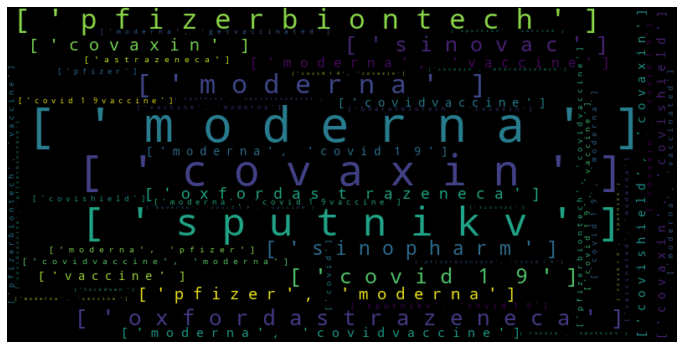

In [93]:
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
def get_value_counts(col_name, analyzer_name, data_frame):
    count = pd.DataFrame(data_frame[col_name].value_counts())
    percentage = pd.DataFrame(data_frame[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [14]:
tweets_df['textblob_score'] = tweets_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
neutral_thresh = 0.05

In [16]:
tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [17]:
tweets_df['textblob_score'].describe()


count    63894.000000
mean         0.104073
std          0.247993
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.233333
max          1.000000
Name: textblob_score, dtype: float64

In [18]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob', tweets_df)
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,7058,11.05,TextBlob
1,Neutral,31767,49.72,TextBlob
2,Positive,25069,39.24,TextBlob


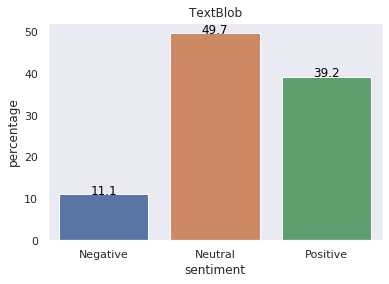

In [19]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [20]:
def getVaccineTypeDF(tweets_df, vaccine_name):
    res_df = pd.DataFrame(columns=tweets_df.columns, index=tweets_df.index)
    tweets_vaccine_df = tweets_df[tweets_df['hashtags'].notna()] 
    tweets_vaccine_df = tweets_vaccine_df.reset_index(drop=True)
    for i in range(0, len(tweets_vaccine_df)):
        tag = tweets_vaccine_df.hashtags.iloc[i]
        tag = (tag).replace('[', '')
        tag = (tag).replace(']', '')
        tag = (tag).replace(' ', '')
        re = list(tag.split(','))
        for j in range(0, len(re)):
            if(re[j] == vaccine_name):
                res_df.iloc[i] = (tweets_vaccine_df.iloc[i])
    res_df = res_df.dropna()
    res_df = res_df.reset_index(drop=True)

    return res_df


In [63]:
vacc_moderna_df = getVaccineTypeDF(tweets_df, "'Moderna'")
vacc_pfizer_df = getVaccineTypeDF(tweets_df, "'PfizerBioNTech'")
vacc_covaxin_df = getVaccineTypeDF(tweets_df, "'Covaxin'")
vacc_astrazeneca_df = getVaccineTypeDF(tweets_df, "'AstraZeneca'")
vacc_sputnikV_df = getVaccineTypeDF(tweets_df, "'SputnikV'")

In [64]:
textblob_sentiment_df_moderna = get_value_counts('textblob_sentiment','TextBlob', vacc_moderna_df)
textblob_sentiment_df_pfizer = get_value_counts('textblob_sentiment','TextBlob', vacc_pfizer_df)
textblob_sentiment_df_covaxin = get_value_counts('textblob_sentiment','TextBlob', vacc_covaxin_df)
textblob_sentiment_df_astrazeneca = get_value_counts('textblob_sentiment','TextBlob', vacc_astrazeneca_df)
textblob_sentiment_df_sputnikV = get_value_counts('textblob_sentiment','TextBlob', vacc_sputnikV_df)

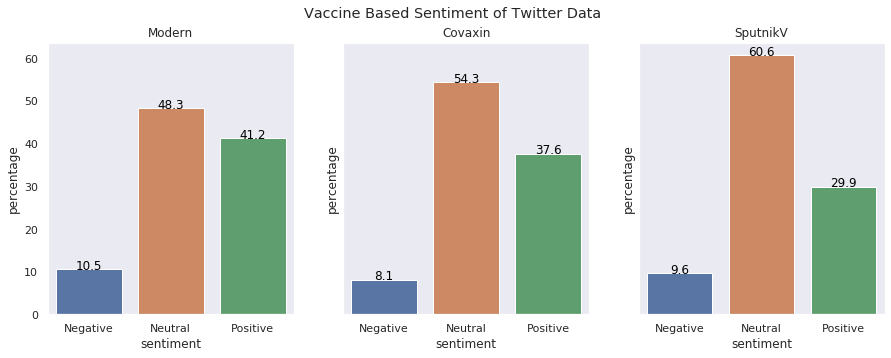

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Vaccine Based Sentiment of Twitter Data')

sns.set_theme(style="dark")
sns.barplot(ax=axes[0], x="sentiment", y="percentage", data=textblob_sentiment_df_moderna)
axes[0].set_title('Modern')
for index, row in textblob_sentiment_df_moderna.iterrows():
    axes[0].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")


sns.set_theme(style="dark")
sns.barplot(ax=axes[1], x="sentiment", y="percentage", data=textblob_sentiment_df_covaxin)
axes[1].set_title('Covaxin')
for index, row in textblob_sentiment_df_covaxin.iterrows():
    axes[1].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

sns.set_theme(style="dark")
sns.barplot(ax=axes[2], x="sentiment", y="percentage", data=textblob_sentiment_df_sputnikV)
axes[2].set_title('SputnikV')
for index, row in textblob_sentiment_df_sputnikV.iterrows():
    axes[2].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

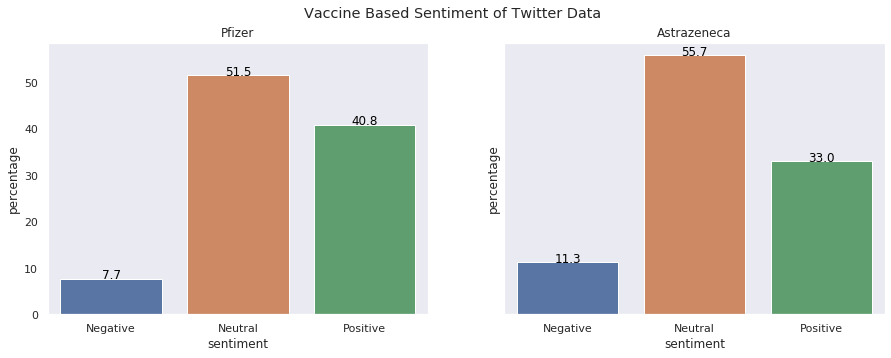

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Vaccine Based Sentiment of Twitter Data')

sns.set_theme(style="dark")
sns.barplot(ax=axes[0], x="sentiment", y="percentage", data=textblob_sentiment_df_pfizer)
axes[0].set_title('Pfizer')
for index, row in textblob_sentiment_df_pfizer.iterrows():
    axes[0].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

sns.set_theme(style="dark")
sns.barplot(ax=axes[1], x="sentiment", y="percentage", data=textblob_sentiment_df_astrazeneca)
axes[1].set_title('Astrazeneca')
for index, row in textblob_sentiment_df_astrazeneca.iterrows():
    axes[1].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [100]:
vacc_moderna_df_sentiment_trend = vacc_moderna_df[['date', 'textblob_score', 'textblob_sentiment']]
vacc_moderna_df_sentiment_trend = vacc_moderna_df_sentiment_trend.sort_values(by='date')

vacc_pfizer_df_sentiment_trend = vacc_pfizer_df[['date', 'textblob_score', 'textblob_sentiment']]
vacc_pfizer_df_sentiment_trend = vacc_pfizer_df_sentiment_trend.sort_values(by='date')

vacc_covaxin_df_sentiment_trend = vacc_covaxin_df[['date', 'textblob_score', 'textblob_sentiment']]
vacc_covaxin_df_sentiment_trend = vacc_covaxin_df_sentiment_trend.sort_values(by='date')

vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df[['date', 'textblob_score', 'textblob_sentiment']]
vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df_sentiment_trend.sort_values(by='date')

vacc_sputnikV_sentiment_trend = vacc_sputnikV_df[['date', 'textblob_score', 'textblob_sentiment']]
vacc_sputnikV_sentiment_trend = vacc_sputnikV_sentiment_trend.sort_values(by='date')

In [101]:
vacc_moderna_df_sentiment_trend.date = pd.to_datetime(vacc_moderna_df_sentiment_trend['date'])
vacc_moderna_df_sentiment_trend['month_year'] = vacc_moderna_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_pfizer_df_sentiment_trend.date = pd.to_datetime(vacc_pfizer_df_sentiment_trend['date'])
vacc_pfizer_df_sentiment_trend['month_year'] = vacc_pfizer_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_covaxin_df_sentiment_trend.date = pd.to_datetime(vacc_covaxin_df_sentiment_trend['date'])
vacc_covaxin_df_sentiment_trend['month_year'] = vacc_covaxin_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_astrazeneca_df_sentiment_trend.date = pd.to_datetime(vacc_astrazeneca_df_sentiment_trend['date'])
vacc_astrazeneca_df_sentiment_trend['month_year'] = vacc_astrazeneca_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_sputnikV_sentiment_trend.date = pd.to_datetime(vacc_sputnikV_sentiment_trend['date'])
vacc_sputnikV_sentiment_trend['month_year'] = vacc_sputnikV_sentiment_trend['date'].dt.strftime('%Y-%m')

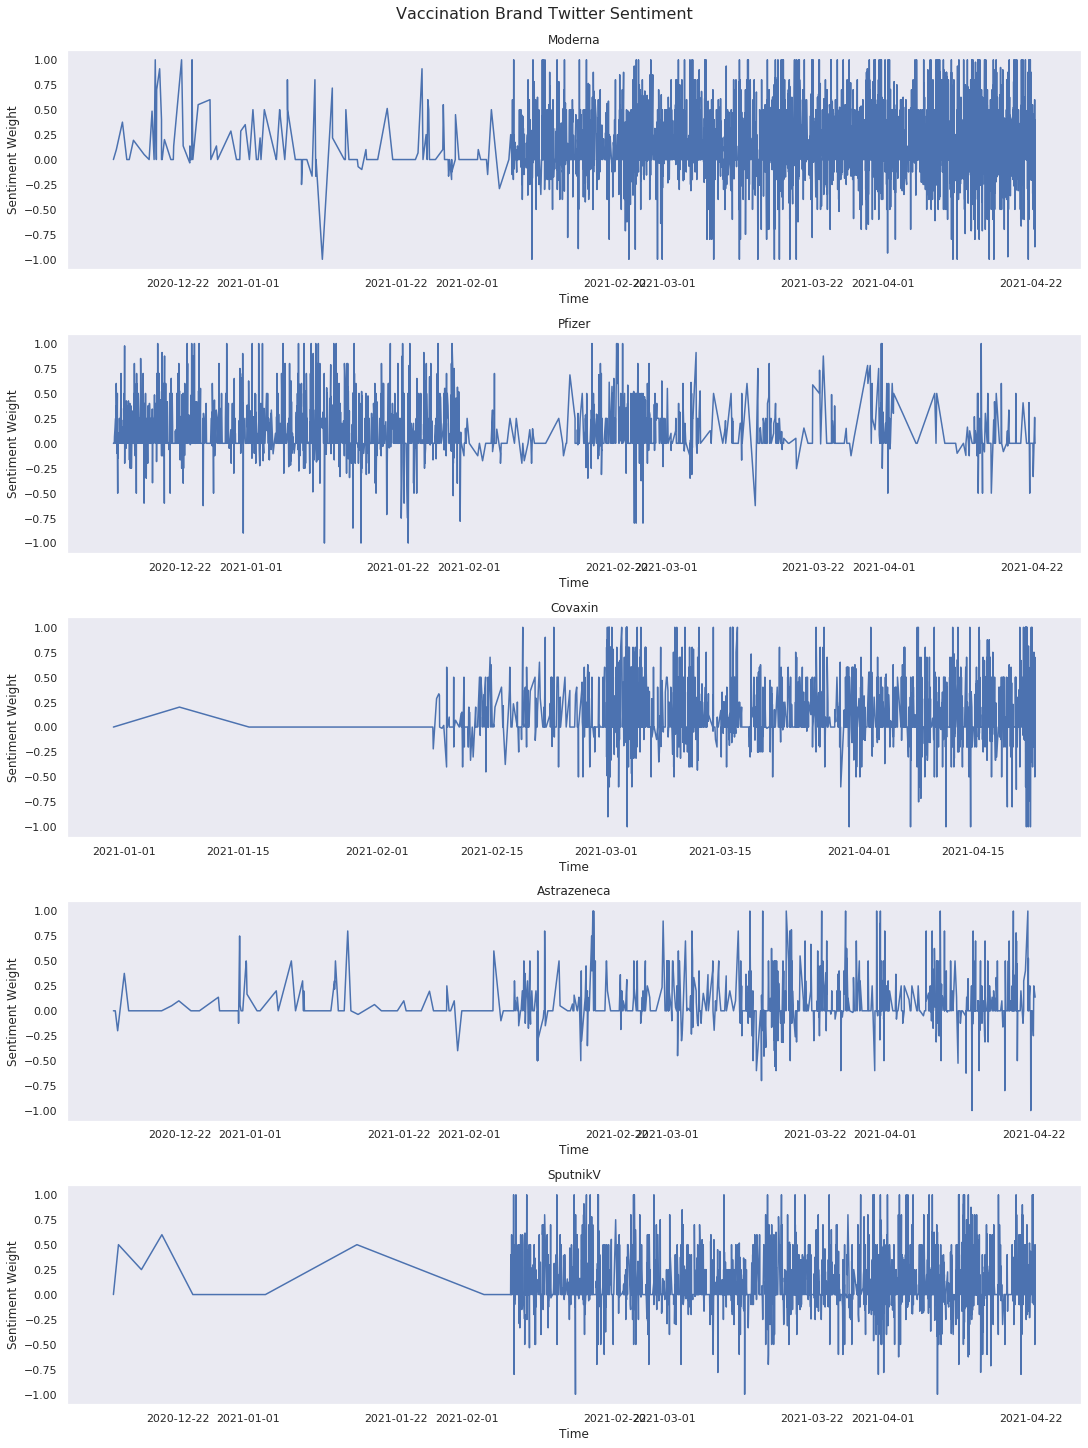

In [106]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 20))
axs[0].plot(vacc_moderna_df_sentiment_trend.date.values,
            vacc_moderna_df_sentiment_trend['textblob_score'])
axs[0].set_title('Moderna')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sentiment Weight')
fig.suptitle('Vaccination Brand Twitter Sentiment', fontsize=16)

axs[1].plot(vacc_pfizer_df_sentiment_trend.date.values,
            vacc_pfizer_df_sentiment_trend['textblob_score'])
axs[1].set_title('Pfizer')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Sentiment Weight')

axs[2].plot(vacc_covaxin_df_sentiment_trend.date.values,
            vacc_covaxin_df_sentiment_trend['textblob_score'])
axs[2].set_title('Covaxin')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Sentiment Weight')

axs[3].plot(vacc_astrazeneca_df_sentiment_trend.date.values,
            vacc_astrazeneca_df_sentiment_trend['textblob_score'])
axs[3].set_title('Astrazeneca')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Sentiment Weight')

axs[4].plot(vacc_sputnikV_sentiment_trend.date.values,
            vacc_sputnikV_sentiment_trend['textblob_score'])
axs[4].set_title('SputnikV')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Sentiment Weight')
plt.show()